Notebook for building analysis of resulting synapse distribution

In [1]:
import os
import sys
sys.path.append("../")
sys.path.append("../Modules/")
import pandas as pd
import h5py

from Modules import analysis

In [2]:
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2024-12-17-16-16-39-ZiaoSynapses_final_detailed_syn_dist_analysis/Complex_InhGmaxApic204_InhGmaxDend7.0_SomaGmax6.0_ExcGmax-1.0351_Np1000"

functions for loading data

In [3]:
# read parameters

# read synapses
def read_synapse_distribution_file(sim_directory):
    """
    Reads the synapse_data.h5 file and loads its datasets into a Pandas DataFrame.

    Parameters:
        sim_directory (str): Path to the directory containing synapse_data.h5.

    Returns:
        pd.DataFrame: A DataFrame where each column corresponds to a dataset in the HDF5 file.
    """
    # Construct the full file path
    synapse_file_path = os.path.join(sim_directory, 'synapse_data.h5')

    # Check if the file exists
    if not os.path.exists(synapse_file_path):
        raise FileNotFoundError(f"File not found: {synapse_file_path}")

    # Dictionary to temporarily store the data
    synapse_data = {}

    # Read the HDF5 file
    with h5py.File(synapse_file_path, 'r') as h5f:
        # Load all datasets into the dictionary
        for key in h5f.keys():
            synapse_data[key] = h5f[key][()]  # Load dataset into memory as NumPy array

    # Convert the dictionary into a Pandas DataFrame
    synapse_df = pd.DataFrame(synapse_data)

    return synapse_df
    
    # read synapse_data.h5

# read voltages, currents?

Load data

In [22]:
# read parameters
parameters = analysis.DataReader.load_parameters(sim_directory)

# read synapses
syn_data = read_synapse_distribution_file(sim_directory)
ben_syn_data = pd.read_csv("/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/Connections.csv")
# /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5
# /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5
# /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5

# read segments
seg_data = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))

# read voltages, currents?

In [23]:
ben_syn_data

,Node ID,Distance,Conductance,Type,Name,Source Population,Release Probability
0,0,61.505696,5.006073e-08,dend,L5PCtemplate[0].dend[60](0.264706),exc_stim,0.60
1,0,112.522057,3.250785e-08,dend,L5PCtemplate[0].dend[28](0.128571),exc_stim,0.60
2,0,73.494480,5.547277e-08,dend,L5PCtemplate[0].dend[29](0.7),exc_stim,0.60
3,0,101.530468,1.005930e-07,dend,L5PCtemplate[0].dend[33](0.264706),exc_stim,0.60
4,0,65.675576,3.045596e-08,dend,L5PCtemplate[0].dend[48](0.409091),exc_stim,0.60
...,...,...,...,...,...,...,...
28897,513,1235.521589,0.000000e+00,apic,L5PCtemplate[0].apic[76](0.685185),dist_inh_stim,0.25
28898,513,994.045757,0.000000e+00,apic,L5PCtemplate[0].apic[38](0.911765),dist_inh_stim,0.25
28899,513,1057.395263,0.000000e+00,apic,L5PCtemplate[0].apic[49](0.54),dist_inh_stim,0.25
28900,513,1040.034952,0.000000e+00,apic,L5PCtemplate[0].apic[61](0.614286),dist_inh_stim,0.25


In [24]:
# Extract `seg_id` and `section` from the `Name` field
ben_syn_data['seg_id'] = ben_syn_data['Name'].str.extract(r'\[(\d+)\]').astype(int)
ben_syn_data['section'] = ben_syn_data['Type']

In [15]:
import h5py

file_paths = [
    '/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5',
    '/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5',
    '/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5'
]

# Inspect the structure of the HDF5 file
for file_path in file_paths:
    try:
        with h5py.File(file_path, 'r') as h5f:
            print(f"\nStructure of {file_path}:")
            h5f.visit(lambda name: print(name))
    except Exception as e:
        print(f"Error inspecting {file_path}: {e}")



Structure of /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5:
spikes
spikes/prox_inh_stim
spikes/prox_inh_stim/node_ids
spikes/prox_inh_stim/timestamps

Structure of /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5:
spikes
spikes/dist_inh_stim
spikes/dist_inh_stim/node_ids
spikes/dist_inh_stim/timestamps

Structure of /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5:
spikes
spikes/exc_stim
spikes/exc_stim/node_ids
spikes/exc_stim/timestamps


In [34]:
import h5py
import pandas as pd

# Define the file paths
file_paths = [
    '/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5',
    '/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5',
    '/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5'
]

# Dictionary to store DataFrames
bens_spike_input_data = {}

for file_path in file_paths:
    try:
        with h5py.File(file_path, 'r') as h5f:
            print(f"\nProcessing {file_path}:")
            
            # Extract all stimulation types
            for stim_type in h5f['spikes'].keys():
                stim_group = h5f[f'spikes/{stim_type}']
                
                # Load node_ids and timestamps
                node_ids = stim_group['node_ids'][()]
                timestamps = stim_group['timestamps'][()]
                
                # Combine into a DataFrame
                df = pd.DataFrame({
                    'node_id': node_ids,
                    'timestamp': timestamps
                })
                
                # Store DataFrame with a meaningful key
                key = f"{file_path}/{stim_type}"
                bens_spike_input_data[key] = df
                print(f"Loaded {key} with {len(df)} rows.")

    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Display the DataFrames
for key, df in bens_spike_input_data.items():
    print(f"\nData from {key}:")
    print(df.head())



Processing /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5:
Loaded /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5/prox_inh_stim with 343821 rows.

Processing /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5:
Loaded /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5/dist_inh_stim with 614347 rows.

Processing /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5:
Loaded /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5/exc_stim with 5251338 rows.

Data from /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/prox_inh_stim_spikes2.h5/prox_inh_stim:
   node_id  timestamp
0        0       55.0
1        0       61.0
2        0      212.0
3        0      346.0
4        0      438.0

Data from /home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/dist_inh_stim_spikes2.h5/dist_inh_stim:
   node_id  timestamp
0        0  

In [42]:
# Calculate mean firing rates
firing_rates = []
for filename, df in bens_spike_input_data.items():
    mean_rates = df.groupby('node_id')['timestamp'].count() / df['timestamp'].max() * 1000
    mean_rates = mean_rates.reset_index().rename(columns={'timestamp': 'mean_firing_rate'})
    mean_rates['synapse_type'] = filename.rsplit('/', 1)[-1]
    firing_rates.append(mean_rates)

# Combine firing rates into a single DataFrame
firing_rates_df = pd.concat(firing_rates)

In [54]:
# Merge Ben's data with firing rates
bens_syn_data = pd.merge(
    ben_syn_data, 
    firing_rates_df, 
    left_on='Node ID', 
    right_on='node_id', 
    how='left'
)

# Add PC Name (example format)
bens_syn_data['pc_name'] = 'b' + bens_syn_data['Node ID'].astype(str)

# Rename columns to match desired format
bens_syn_data = bens_syn_data.rename(columns={
    'Node ID': 'seg_id',
    'Conductance': 'weight'
})

# Reorder and select relevant columns
bens_syn_data = bens_syn_data[['mean_firing_rate', 'pc_name', 'seg_id', 'synapse_type', 
                           'weight', 'Distance', 'section']]

In [55]:
bens_syn_data

,mean_firing_rate,pc_name,seg_id,seg_id,synapse_type,weight,Distance,section
0,20.846806,b0,0,0,prox_inh_stim,5.006073e-08,61.505696,dend
1,12.040080,b0,0,0,dist_inh_stim,5.006073e-08,61.505696,dend
2,10.386736,b0,0,0,exc_stim,5.006073e-08,61.505696,dend
3,20.846806,b0,0,0,prox_inh_stim,3.250785e-08,112.522057,dend
4,12.040080,b0,0,0,dist_inh_stim,3.250785e-08,112.522057,dend
...,...,...,...,...,...,...,...,...
35000,9.166728,b513,513,0,exc_stim,0.000000e+00,1057.395263,apic
35001,4.173361,b513,513,0,dist_inh_stim,0.000000e+00,1040.034952,apic
35002,9.166728,b513,513,0,exc_stim,0.000000e+00,1040.034952,apic
35003,4.173361,b513,513,0,dist_inh_stim,0.000000e+00,823.072997,apic


Back to ours

In [20]:
len(seg_data)

2511

In [ ]:
max(dataframes['/home/drfrbc/Neural-Modeling/scripts/L5BaselineResults/exc_stim_spikes2.h5/exc_stim'])

5221

In [6]:
if len(seg_data) != max(syn_data.seg_id):
    print(f"{len(seg_data)} != {max(syn_data.seg_id)} need to check that syn_data.seg_id actually corresponds to seg_data row index.")

2511 != 2507 need to check that syn_data.seg_id actually corresponds to seg_data row index.


functions for organizing data

In [7]:
def add_seg_info_to_syn_data(syn_data, seg_data):
    """
    Adds segment information (Distance and section) from seg_data to syn_data
    using the seg_id as a lookup.

    Parameters:
        syn_data (pd.DataFrame): DataFrame containing synapse data with 'seg_id'.
        seg_data (pd.DataFrame): DataFrame containing segment data.

    Returns:
        pd.DataFrame: Updated syn_data with 'Distance' and 'section' columns added.
    """
    # Set 'Unnamed: 0' as the index in seg_data for easy lookup
    seg_data_indexed = seg_data.set_index('Unnamed: 0')

    # Use .loc to map the segment information to syn_data based on seg_id
    syn_data['Distance'] = syn_data['seg_id'].map(seg_data_indexed['Distance'])
    syn_data['section'] = syn_data['seg_id'].map(seg_data_indexed['section'])

    return syn_data

In [74]:
syn_data = add_seg_info_to_syn_data(syn_data, seg_data)

In [75]:
syn_data

,mean_firing_rate,pc_name,seg_id,synapse_type,weight,Distance,section
0,9.0,b'fg_0_cell9',0,b'soma_inh',6.000000,0.000000,soma
1,18.0,b'fg_0_cell2',0,b'soma_inh',6.000000,0.000000,soma
2,11.0,b'fg_0_cell13',0,b'soma_inh',6.000000,0.000000,soma
3,24.0,b'fg_0_cell141',0,b'soma_inh',6.000000,0.000000,soma
4,16.0,b'fg_0_cell63',0,b'soma_inh',6.000000,0.000000,soma
...,...,...,...,...,...,...,...
15500,13.0,b'fg_4_cell27',1475,b'exc',0.789016,624.284848,apic
15501,4.0,b'fg_36_cell92',1172,b'exc',0.509706,314.254647,apic
15502,9.0,b'fg_4_cell84',1477,b'exc',0.555895,634.325050,apic
15503,12.0,b'fg_13_cell94',1840,b'exc',0.227545,844.963649,apic


## Plotting, group by synapse type

In [87]:
import matplotlib.pyplot as plt

# Group the data by 'synapse_type'
syn_data_grouped_by_type = syn_data.groupby('synapse_type')
bens_syn_data_grouped_by_type = bens_syn_data.groupby('synapse_type')

def plot_by_group(x_var, y_var, syn_data_grouped_by_type):
    plt.figure(figsize=(10, 6))
    # Iterate through each group and plot
    for syn_type, group in syn_data_grouped_by_type:
        plt.scatter(group[x_var], group[y_var], label=syn_type, alpha=0.7)
    # Add plot details
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{y_var} vs {x_var} by Synapse Type')
    plt.legend(title='Synapse Type')
    plt.grid(True)
    # Show the plot
    plt.show()
    
import seaborn as sns
import matplotlib.pyplot as plt

def plot_2d_pdf_by_group(x_var, y_var, syn_data_grouped_by_type):
    """
    Plots the 2D probability density function for specified X and Y variables, grouped by synapse type.
    The legend is manually constructed to ensure it displays all groups correctly.

    Parameters:
        x_var (str): The variable to use for the X-axis (e.g., 'Distance').
        y_var (str): The variable to use for the Y-axis (e.g., 'mean_firing_rate').
        syn_data_grouped_by_type (GroupBy object): The grouped data (e.g., grouped by 'synapse_type').
    """
    plt.figure(figsize=(10, 6))

    # Define a color palette for the groups
    palette = sns.color_palette("husl", len(syn_data_grouped_by_type))
    colors = iter(palette)

    # Dummy handles for the legend
    legend_handles = []

    # Plot each group with a unique color
    for syn_type, group in syn_data_grouped_by_type:
        color = next(colors)
        sns.kdeplot(
            x=group[x_var],
            y=group[y_var],
            fill=True,
            alpha=0.3,
            color=color
        )
        # Add a dummy handle for the legend
        legend_handles.append(plt.Line2D([0], [0], color=color, lw=4, label=syn_type))

    # Add plot details
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'2D Probability Density of {y_var} vs {x_var} by Synapse Type')
    plt.legend(handles=legend_handles, title='Synapse Type', loc='best')
    plt.grid(True)
    # Show the plot
    plt.show()

In [72]:
syn_data_grouped_by_type

plot firing rate as a function of distance

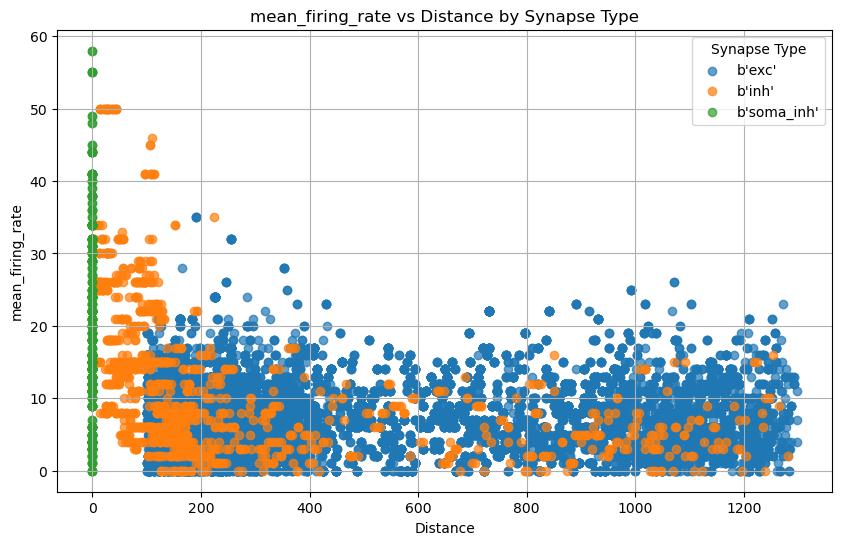

In [78]:
# plt.scatter(syn_data.Distance, syn_data.mean_firing_rate)

plot_by_group(x_var='Distance', y_var='mean_firing_rate', syn_data_grouped_by_type=syn_data_grouped_by_type)

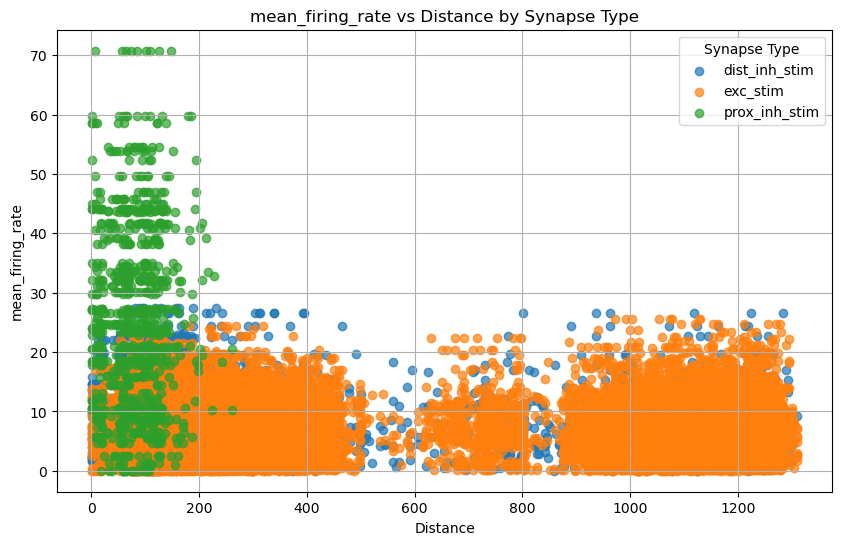

In [86]:
plot_by_group(x_var='Distance', y_var='mean_firing_rate', syn_data_grouped_by_type=bens_syn_data_grouped_by_type)

/tmp/ipykernel_3578515/2817850920.py:46: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


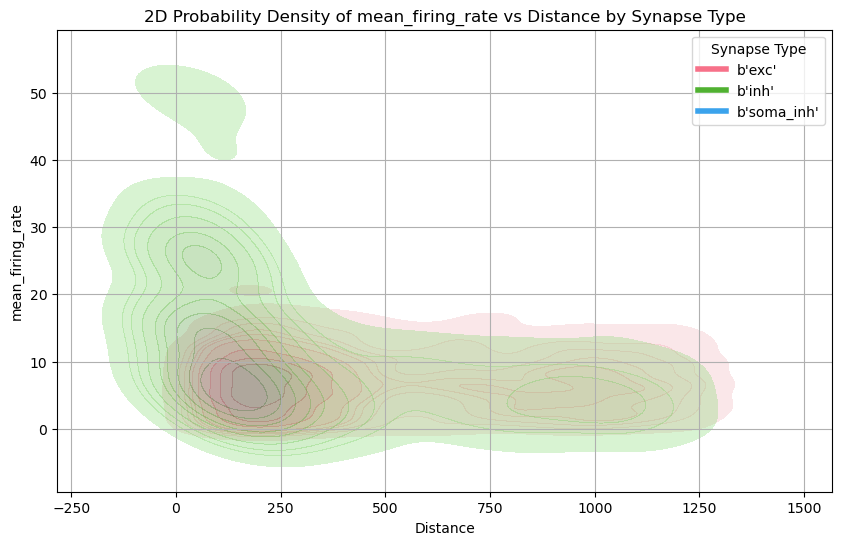

In [88]:
plot_2d_pdf_by_group(x_var='Distance', y_var='mean_firing_rate', syn_data_grouped_by_type=syn_data_grouped_by_type)

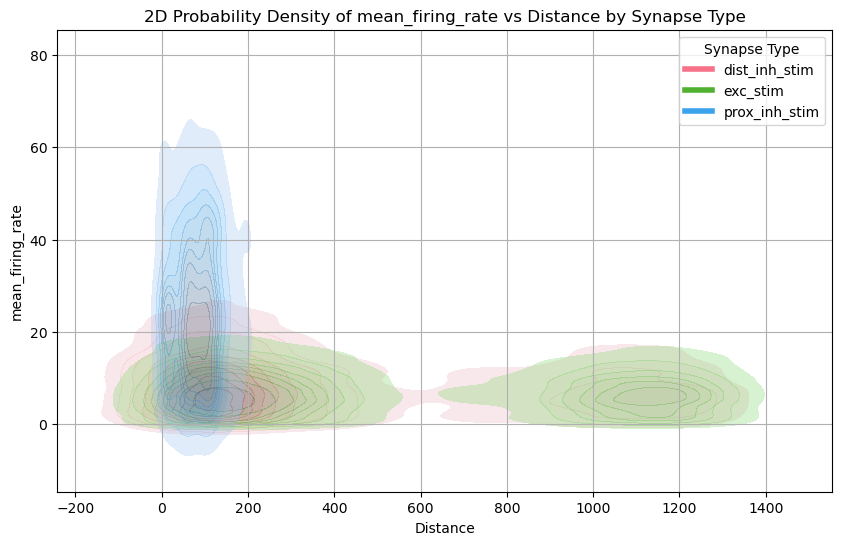

In [89]:
plot_2d_pdf_by_group(x_var='Distance', y_var='mean_firing_rate', syn_data_grouped_by_type=bens_syn_data_grouped_by_type)

weight as a function of Distance

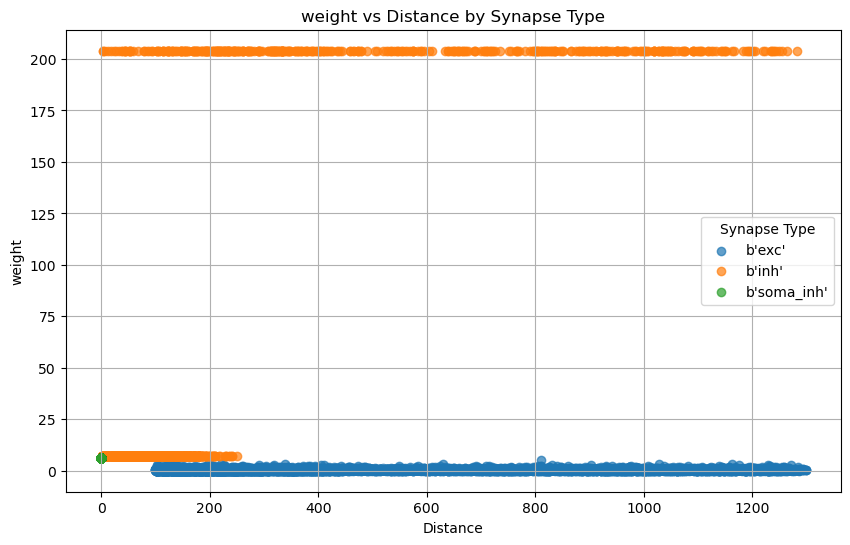

In [ ]:
plot_by_group(x_var='Distance', y_var='weight', syn_data_grouped_by_type=syn_data_grouped_by_type)

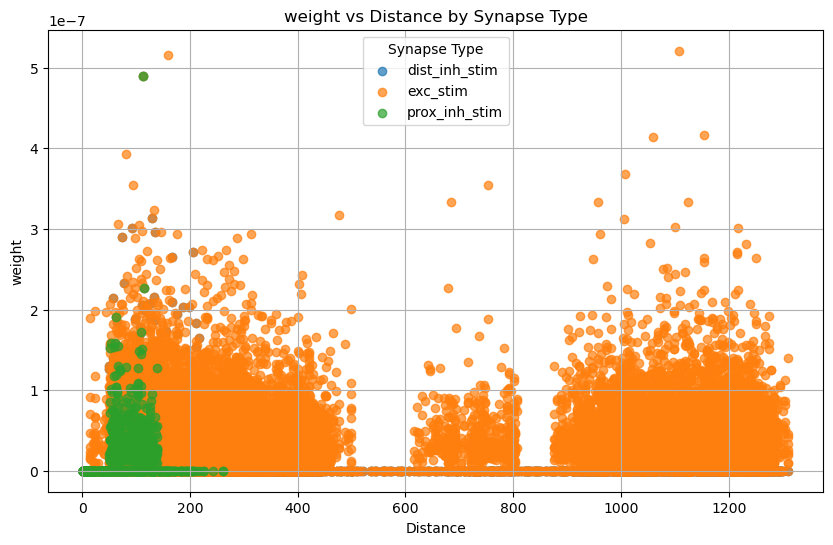

In [61]:
plot_by_group(x_var='Distance', y_var='weight', syn_data_grouped_by_type=bens_syn_data_grouped_by_type)

/tmp/ipykernel_3578515/2817850920.py:46: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


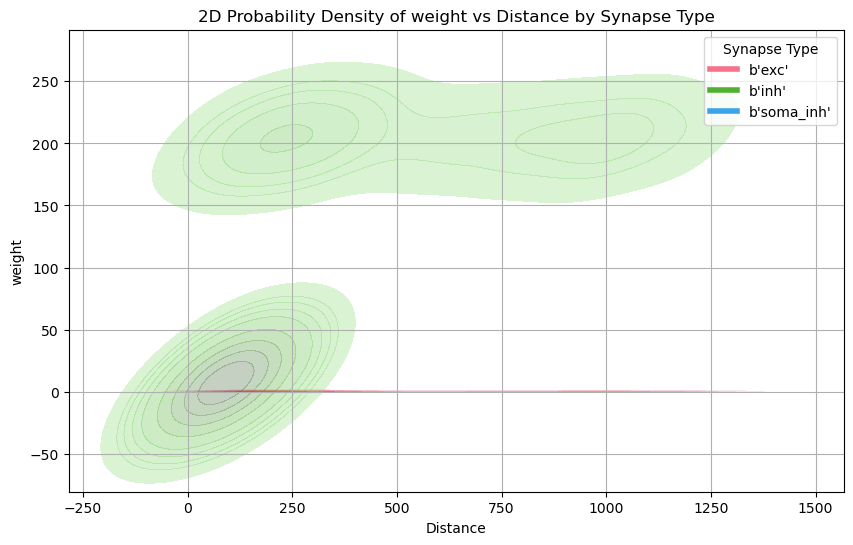

In [90]:
plot_2d_pdf_by_group(x_var='Distance', y_var='weight', syn_data_grouped_by_type=syn_data_grouped_by_type)

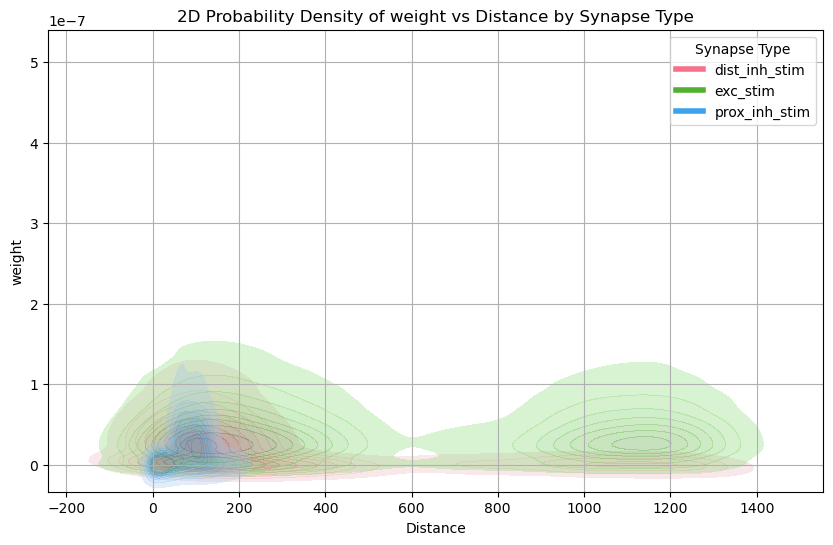

In [91]:
plot_2d_pdf_by_group(x_var='Distance', y_var='weight', syn_data_grouped_by_type=bens_syn_data_grouped_by_type)

plot firing rate as a function of transfer impedance

plot weight as a function of transfer impedance?

plot cumulative in-path gmax as a function of transfer impedance?